# Practical Questions - Logistic Regression

### **1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.**

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# we can load any datasets from the datasets module in scikit-learn library
# else, we can also load any csv dataset using pd.read_csv('file_name.csv)

from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
## necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


### it's a multiclass problem, there are 3 categories, 0, 1, 2
## we have to specify that in the model

### X, y 

X = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=95)

## MODEL
multi_logistic_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter=200)    #softmax regression
multi_logistic_model.fit(X_train,y_train)


LogisticRegression(max_iter=200, multi_class='multinomial')

In [15]:
y_pred = multi_logistic_model.predict(X_test)
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print(f"Accuracy with of multinomial logistic model = {accuracy:.3f}")

Accuracy with of multinomial logistic model = 0.974


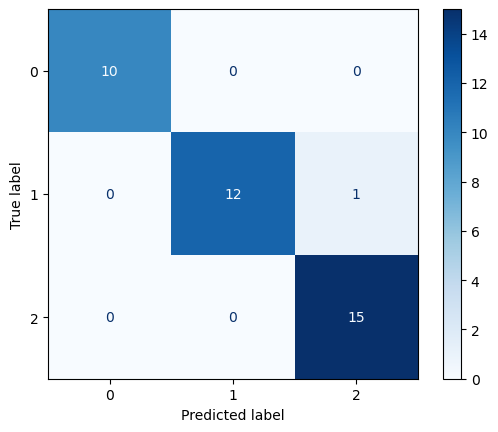

In [16]:
## Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = multi_logistic_model.classes_)
cm_display.plot(cmap = "Blues")

### **2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.**

In [17]:
### Taking only the binary part of the iris dataset
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df_binary = iris_df[iris_df['target'] != 2]    #removing the class 2
# iris_df_binary

X = iris_df_binary.iloc[ : , :-1]
y = iris_df_binary.iloc[: , -1]


#trian - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=95)


### Model Lasso penalty
l1_logistic = LogisticRegression(penalty = 'l1', solver = 'liblinear')  #binary classification
l1_logistic.fit(X_train, y_train)


## predictions
y_pred = l1_logistic.predict(X_test)

l1_acc = accuracy_score(y_test, y_pred)

print("Feature coefficients:", l1_logistic.coef_)
print(f"\nL1-Regularized Logistic Regression Accuracy: {l1_acc:.4f}")


Feature coefficients: [[ 0.         -2.36255984  2.62393091  0.        ]]

L1-Regularized Logistic Regression Accuracy: 1.0000


### Iris dataset binary gives accuracy 1.
- But because of the use of l1 penalty (regularization) which is used to eliminate the insignificant features by reducing the coefficients 0.

### **3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.**

In [18]:
### On the same IRIS BINARY DATASET

### Model Ridge penalty
l2_logistic = LogisticRegression(penalty = 'l2')  ##for l2 default solver is 'lbfgs'
l2_logistic.fit(X_train, y_train)


## predictions
y_pred = l2_logistic.predict(X_test)

l2_acc = accuracy_score(y_test, y_pred)

print("Feature coefficients:", l2_logistic.coef_)
print(f"\nL2-Regularized Logistic Regression Accuracy: {l2_acc:.4f}")

Feature coefficients: [[ 0.47175557 -0.78230057  2.20106166  0.88550228]]

L2-Regularized Logistic Regression Accuracy: 1.0000


#### Here the accuracy remains 1.
- But L2 (Ridge) Regularization is mainly used to reduce overfitting. So here the coefficients is not zero

### **4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').**

In [19]:
from sklearn.metrics import classification_report
### Model elasticnet penalty
l12_logistic = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5, C = 1)  ## Elastic net
l12_logistic.fit(X_train, y_train)


## predictions
y_pred = l12_logistic.predict(X_test)

l12_acc = accuracy_score(y_test, y_pred)
l12_report = classification_report(y_test,y_pred)

print("Feature coefficients:", l12_logistic.coef_)
print("Classification Report :\n ", l12_report)

print(f"\n(L1 + L2) Elastic net -Regularized Logistic Regression Accuracy: {l12_acc:.4f}")

Feature coefficients: [[-0.23163673 -1.53997477  2.29627965  0.65398821]]
Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


(L1 + L2) Elastic net -Regularized Logistic Regression Accuracy: 1.0000


### **5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.**

In [20]:
### Multiclass Logistic
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
y = iris_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=95)

## MODEL
multi_ovr_logistic_model = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter=200)    #softmax regression
multi_ovr_logistic_model.fit(X_train,y_train)


LogisticRegression(max_iter=200, multi_class='ovr')

Report on OVR:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.88      1.00      0.94        15

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


Logistic Regression (One-vs-Rest) Accuracy: 0.9474


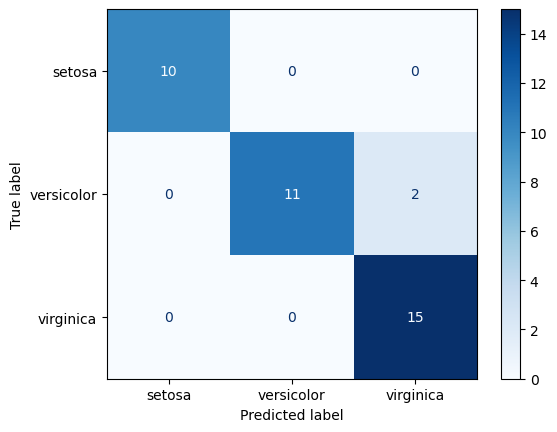

In [22]:

y_pred_ovr = multi_ovr_logistic_model.predict(X_test)
ovr_acc = accuracy_score(y_test, y_pred_ovr)
print("Report on OVR: ", classification_report(y_test, y_pred_ovr))

print(f"\nLogistic Regression (One-vs-Rest) Accuracy: {ovr_acc:.4f}")

#Confusion Matrix

cm = confusion_matrix(y_test, y_pred=y_pred_ovr)
disp_cm = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp_cm.plot(cmap="Blues")

### **6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.**

In [23]:
### USING THE COMPLETE Breast cancer DATASET - Binary

from sklearn.datasets import load_breast_cancer
d = load_breast_cancer()

X = pd.DataFrame(d.data, columns = d.feature_names)
y = d.target

# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95, test_size=0.2)

In [24]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
log_reg = LogisticRegression()          #not giving any parameters
log_reg.fit(X_train, y_train)       

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test)

print(f"Accuracy Score (Without any arguments given in the model): {round(accuracy_score(y_test, y_pred)*100, 2)}%")

print("\nClassfication Report : \n", classification_report(y_test, y_pred))

Accuracy Score (Without any arguments given in the model): 97.37%

Classfication Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



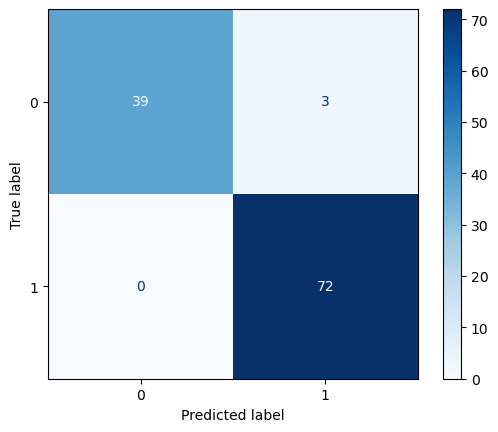

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= log_reg.classes_)
cm_disp.plot(cmap= "Blues")

In [28]:
####### HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.linspace(1, 50, num=10),
    'solver' : [ 'lbfgs', 'liblinear']
}

gridCV = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, cv = 5)
gridCV.fit(X_train, y_train)        # here the train data further splits to training and validation data

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear']})

In [29]:
print(f"Best Parameters after Tuning : {gridCV.best_params_}")  

Best Parameters after Tuning : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


- Lasso Regularization

In [30]:
gridCV.best_params_['solver']

'liblinear'

In [31]:
### New Model with the tuned parameter
tuned_model = LogisticRegression(penalty=gridCV.best_params_['penalty'] , C = gridCV.best_params_['C'], solver= gridCV.best_params_['solver'])
tuned_model.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [32]:
y_pred_tuned = tuned_model.predict(X_test)

print(f"Accuracy Score with the Tuned Parameter : {round(accuracy_score(y_test, y_pred_tuned)*100 , 2)}%")

print("\nClassification Report : \n", classification_report(y_test, y_pred_tuned))

Accuracy Score with the Tuned Parameter : 93.86%

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        42
           1       0.91      1.00      0.95        72

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [33]:
log_reg.coef_

array([[-0.42906281, -0.47019444, -0.3758111 , -0.49482191, -0.2350953 ,
         0.42098485, -0.5302929 , -0.88090456,  0.02378322,  0.2382906 ,
        -1.36452821,  0.40705326, -0.67009056, -0.99751471, -0.1892213 ,
         0.57131746, -0.01501871, -0.2682312 ,  0.30283704,  0.68646157,
        -0.97866524, -1.1233344 , -0.78344943, -0.93064392, -0.79666182,
        -0.17477603, -0.78451403, -0.77485675, -0.41623345, -0.53029514]])

In [34]:
print(f"After using the tuned model, {(tuned_model.coef_ == 0).sum()} coefficients became 0")

After using the tuned model, 17 coefficients became 0


### **7 & 8. Write a Python program to load csv dataset. apply logistic regression. evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.**


- Using the titanic dataset : https://www.kaggle.com/datasets/yasserh/titanic-dataset/

- Survived: Binary
- Pclass: Categorical (1,2,3 #ticket class)
- Sex: M/F
- SibSp: no of sibling spouses
- Parch: no of parents children

### We have to predict the survival. Binary classification

#### **First applying simple logistic** and Printing accuracy

In [35]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Titanic dataset (assumes train.csv is in your directory)
data = pd.read_csv('Titanic-Dataset.csv')
# data.head()

# Basic preprocessing and EDA

data['Age'].fillna(data['Age'].mean(), inplace=True)    #filling age with mean age


# Convert categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)
data.drop(['Cabin', 'Ticket', 'Name','PassengerId'], axis = 1, inplace = True)
data.Embarked = data['Embarked'].astype(int)


In [36]:
# data.info()

In [37]:
# data.describe()

In [38]:
# data.Embarked.value_counts()

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [40]:
# defining X and y
X = data.iloc[ : ,1:]
y = data.Survived

from sklearn.model_selection import train_test_split


# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 95, stratify= y) #stratify Ensures class balance is maintained in train and test sets.

# Check the shape of the data
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

## Scaling - only the numerical features Age and Fare
nums = ['Age', 'Fare']
scaler = StandardScaler()
X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

X_train.head()

Train set shape: (712, 7)
Test set shape: (179, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,0,-0.021204,2,0,-0.203767,2
586,2,0,1.350569,0,0,-0.368221,0
291,1,1,-0.869528,1,0,1.148333,1
431,3,1,-0.021204,1,0,-0.346294,0
705,2,0,0.716256,0,0,-0.148949,0


Logistic Regression Model Accuracy: 75.98%



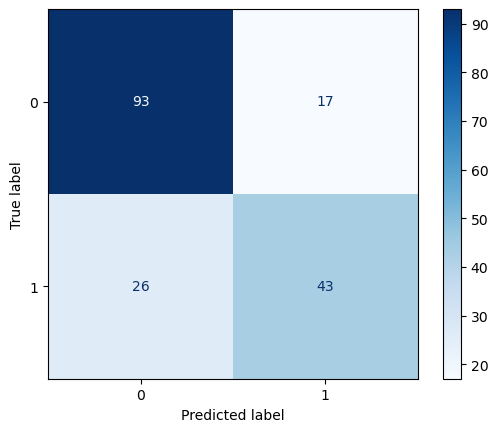

In [41]:
### MODEL

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

ypred = model.predict(X_test)

acc = accuracy_score(y_test, ypred)


print(f"Logistic Regression Model Accuracy: {round(acc*100, 2)}%\n")
cm = confusion_matrix(y_test, ypred)

disp_cm = ConfusionMatrixDisplay(cm, display_labels= model.classes_)
disp_cm.plot(cmap= "Blues")

#### **Stratified K-Fold**

In [42]:
from sklearn.model_selection import StratifiedKFold , cross_val_score

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 95) #5 splits

model2 = LogisticRegression(max_iter=500)

cv_scores = cross_val_score(estimator= model2, X = X, y = y, cv = skf, scoring= 'accuracy')
# cv_scores
print(f"The average accuracy after applying Stratified K-Fold(5) cross validation {round(np.mean(cv_scores)*100 ,2)}%")

# earlier it was 79.8%

The average accuracy after applying Stratified K-Fold(5) cross validation 79.8%


### **9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.**

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer() #shape of the data : 569, 30 features

X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target  # Features and target

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

## Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## TUNING
# # Define hyperparameter grid
parameters_grid = {
    'C': np.linspace(0.1, 20, 10),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Compatible solvers for L1 & L2
}


#  Initializing simple Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# # Randomized Search with 10 iterations, 5-fold CV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=parameters_grid, n_iter=10, cv=5, scoring='accuracy', random_state=95, n_jobs=-1)
random_search.fit(X_train, y_train)

# # Get best parameters
best_params = random_search.best_params_
print("Best parameters combination using Randomized search CV: ", best_params)



Best parameters combination using Randomized search CV:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


Test Set Accuracy: 96.49%



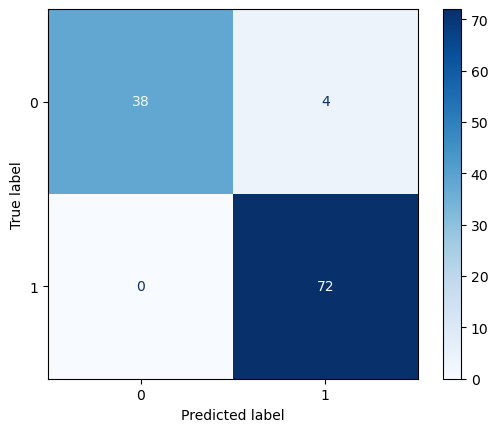

In [44]:
## Tuned model
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"Test Set Accuracy: {round(accuracy*100,2)}%\n") 


# confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp_cm = ConfusionMatrixDisplay(cm, display_labels= best_model.classes_)
disp_cm.plot(cmap= "Blues")

### **10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.**

One-vs-One Logistic Regression Accuracy: 96.67%


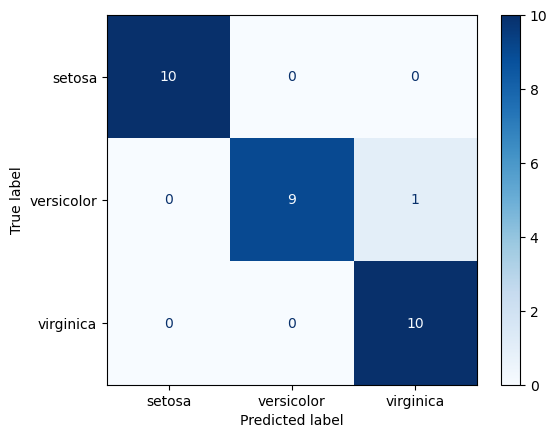

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target (3 classes: 0, 1, 2)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

# Apply One-vs-One (OvO) strategy with Logistic Regression
model_ovo = OneVsOneClassifier(estimator=LogisticRegression(solver='lbfgs', max_iter=500))
model_ovo.fit(X_train, y_train)

# Predict on test data
y_pred = model_ovo.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"One-vs-One Logistic Regression Accuracy: {round(accuracy*100,2)}%") #for ovr it was 94.74%

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp_cm.plot(cmap="Blues")


### **11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.**

In [46]:
### done in every question

### **12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.**

Precision: 95.24% 	 Recall: 94.44% 	 F1-Score: 94.44%

Classification Report:
               precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       1.00      0.86      0.92        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



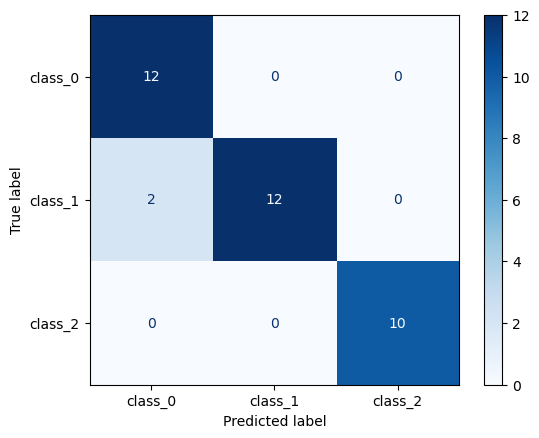

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)  # Features
y = wine.target  # Target (3 classes: 0, 1, 2)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(cm, display_labels=wine.target_names)
disp_cm.plot(cmap="Blues")

# Compute Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Precision: {round(precision*100,2)}% \t Recall: {round(recall*100,2)}% \t F1-Score: {round(f1*100,2)}%")


# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))




### **13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.**

Without class weights, Accuracy: 93.76% 
 With class weights, Accuracy: 87.03%

Without Class Weights:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1485
           1       0.75      0.56      0.64       165

    accuracy                           0.94      1650
   macro avg       0.85      0.77      0.80      1650
weighted avg       0.93      0.94      0.93      1650


With Class Weights (Balanced):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1485
           1       0.43      0.87      0.57       165

    accuracy                           0.87      1650
   macro avg       0.71      0.87      0.75      1650
weighted avg       0.93      0.87      0.89      1650


CM for Unbalanced : 

CM for Balanced : 


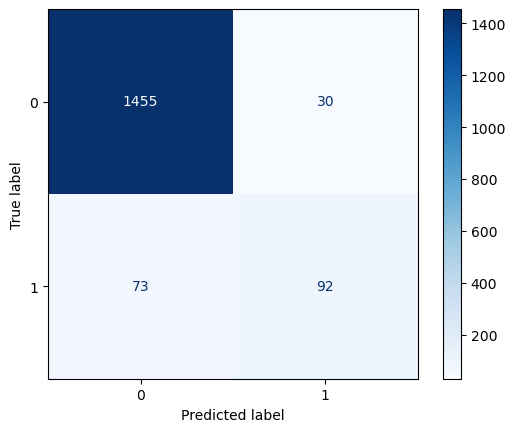

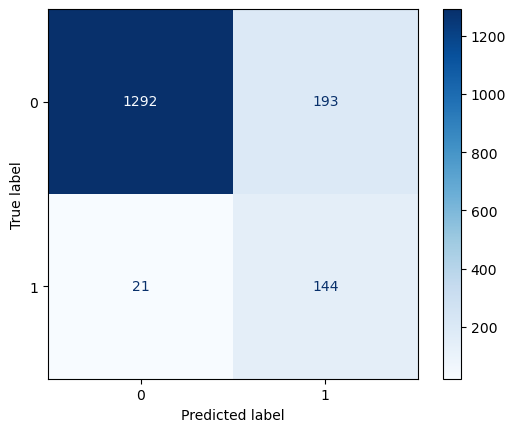

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creating an Imbalanced Dataset (90% class 0, 10% class 1)
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=95)

# # Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=95, stratify=y)

# # Train Logistic Regression model (with and without class weights)
model_balanced = LogisticRegression(class_weight='balanced', max_iter=500, random_state=95)

model_unbalanced = LogisticRegression(max_iter=500, random_state=95)

model_balanced.fit(X_train, y_train)
model_unbalanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = model_balanced.predict(X_test)
y_pred_unbalanced = model_unbalanced.predict(X_test)

# accuracy scores
acc_balanced = round(accuracy_score(y_test, y_pred_balanced)*100,2)
acc_unbalanced = round(accuracy_score(y_test, y_pred_unbalanced)*100,2)

print(f"Without class weights, Accuracy: {acc_unbalanced}% \n With class weights, Accuracy: {acc_balanced}%")


# Evaluation
print("\nWithout Class Weights:")
print(classification_report(y_test, y_pred_unbalanced))

print("\nWith Class Weights (Balanced):")
print(classification_report(y_test, y_pred_balanced))

print("\nCM for Unbalanced : ")
cm1 = confusion_matrix(y_test, y_pred_unbalanced)
disp_cm1 = ConfusionMatrixDisplay(cm1, display_labels=model_unbalanced.classes_)
disp_cm1.plot(cmap="Blues")

print("\nCM for Balanced : ")
cm2 = confusion_matrix(y_test, y_pred_balanced)
disp_cm2 = ConfusionMatrixDisplay(cm2, display_labels=model_balanced.classes_)
disp_cm2.plot(cmap="Blues")


- Without Class Weights : *Higher accuracy (94%)*, but **poor recall** for minority class (56%)

> The model predicts Class 0 very well (98% recall) but struggles to identify Class 1 correctly which is due to the bias.Many Class 1 samples are misclassified as Class 0 (False Negatives are high).

- With Class Weights : Lower accuracy (87%), but **better recall** for minority class (87%)

> The model now identifies Class 1 correctly much better (recall improved from 56% → 87%). However, precision for Class 1 dropped from 75% → 43% (meaning more false positives).

### **14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.**

- Already did for Q8.


- Using the titanic dataset : https://www.kaggle.com/datasets/yasserh/titanic-dataset/

- Survived: Binary
- Pclass: Categorical (1,2,3 #ticket class)
- Sex: M/F
- SibSp: no of sibling spouses
- Parch: no of parents children

**We have to predict the survival. Binary classification**

Train set shape: (712, 7)
Test set shape: (179, 7)
Logistic Regression Model Accuracy: 75.98%



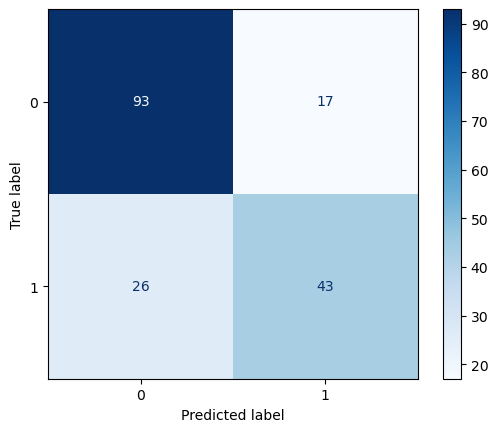

In [49]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Titanic dataset (assumes train.csv is in your directory)
data = pd.read_csv('Titanic-Dataset.csv')
# data.head()

# Basic preprocessing and EDA

data['Age'].fillna(data['Age'].mean(), inplace=True)    #filling age with mean age


# Convert categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)
data.drop(['Cabin', 'Ticket', 'Name','PassengerId'], axis = 1, inplace = True)
data.Embarked = data['Embarked'].astype(int)

# defining X and y
X = data.iloc[ : ,1:]
y = data.Survived

from sklearn.model_selection import train_test_split


# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 95, stratify= y) #stratify Ensures class balance is maintained in train and test sets.

# Check the shape of the data
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

## Scaling - only the numerical features Age and Fare
nums = ['Age', 'Fare']
scaler = StandardScaler()
X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

# X_train.head()

### MODEL

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

ypred = model.predict(X_test)

acc = accuracy_score(y_test, ypred)


print(f"Logistic Regression Model Accuracy: {round(acc*100, 2)}%\n")
cm = confusion_matrix(y_test, ypred)

disp_cm = ConfusionMatrixDisplay(cm, display_labels= model.classes_)
disp_cm.plot(cmap= "Blues")


In [50]:
#### ADDING MORE PERFORMANCE METRICS
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, ypred, target_names=["Not Survived", "Survived"]))




Classification Report:

              precision    recall  f1-score   support

Not Survived       0.78      0.85      0.81       110
    Survived       0.72      0.62      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179



According to this,
- Out of all predicted survivors 78% was actually survived. (Precision)
- Out of all actual survivors 85% were corectly predicted.
- F1 score is the harmonic mean of Precision and Recall.


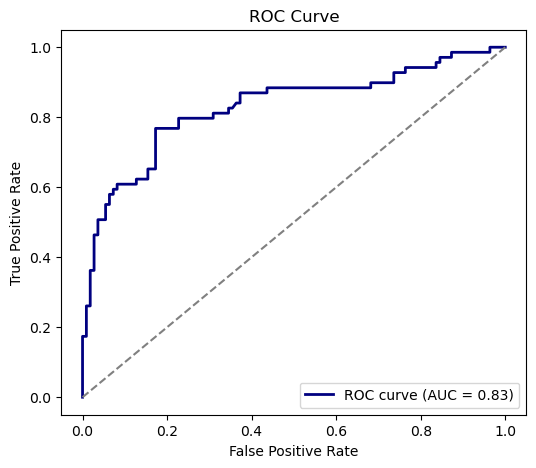

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predicted probabilities for the positive class (Survived)
y_probs = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


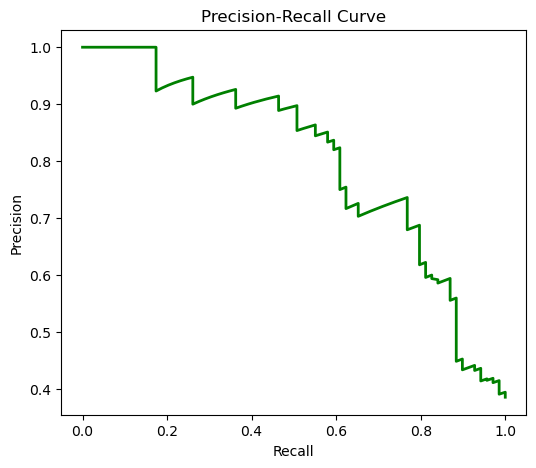

In [52]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='g', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


### **15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.**

- Using the wine data.


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)  # Features
y = wine.target  # Target (3 classes: 0, 1, 2)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

#WITHOUT Scaling
model_no_scaling = LogisticRegression(max_iter=500, random_state=95)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = round(accuracy_score(y_test, y_pred_no_scaling) * 100, 2)


## WITH Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(max_iter=500, random_state=95)
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
acc_with_scaling = round(accuracy_score(y_test, y_pred_with_scaling) * 100, 2)

### **Compare Results**
print(f"Accuracy WITHOUT Scaling: {acc_no_scaling}%")
print(f"Accuracy WITH Scaling: {acc_with_scaling}%\n")

print("Classification Report WITHOUT Scaling:\n", classification_report(y_test, y_pred_no_scaling))
print("Classification Report WITH Scaling:\n", classification_report(y_test, y_pred_with_scaling))


Accuracy WITHOUT Scaling: 97.22%
Accuracy WITH Scaling: 100.0%

Classification Report WITHOUT Scaling:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Classification Report WITH Scaling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### **16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.**
- Done in previous question with titanic data

### **17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.**

In [54]:
# WINE DATA

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report

#  Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)  # Features
y = wine.target  # Target (3 classes: 0, 1, 2)

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

# Train Logistic Regression with custom regularization (C = 0.5)
model = LogisticRegression(C=0.5, max_iter=500, random_state=95, multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)


print(f"Logistic Regression Model Accuracy (C=0.5): {accuracy}%\n")

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Logistic Regression Model Accuracy (C=0.5): 97.22%

Classification Report:
               precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### **18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.**

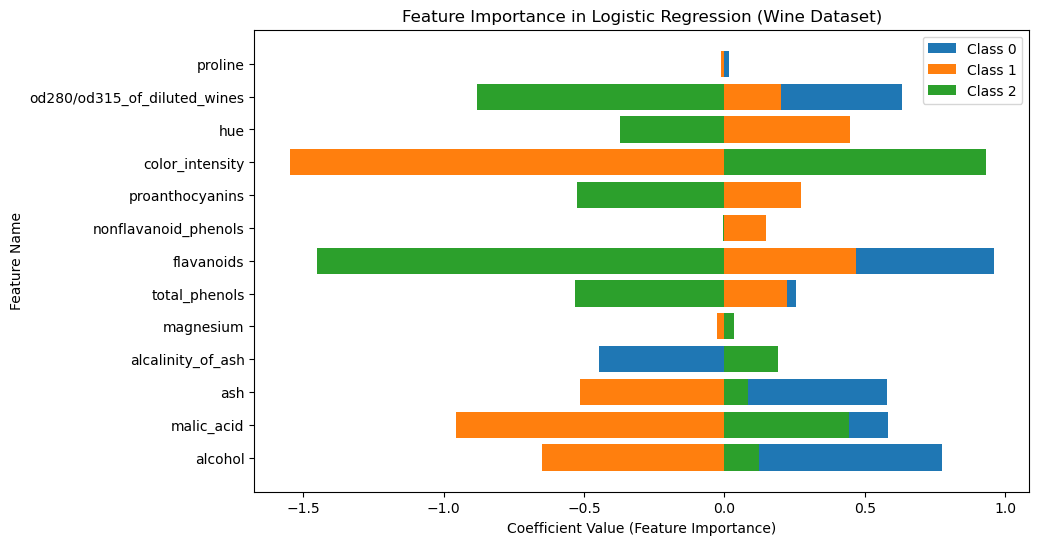

In [55]:
### Continuing the previous model
# wine.data.shape
coefs = model.coef_
# coefs.shape #13 features and 3 classes

# Plotting feature importance for each class
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.barh(X.columns, coefs[i], label=f'Class {i}')
    
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Logistic Regression (Wine Dataset)")
plt.legend()
plt.show()

### **19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score.**

In [56]:
from sklearn.metrics import cohen_kappa_score

# Cohen's Kappa Score for the Wine dataset model
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9580


- Cohen's kappa is a measure of **How well the model's prediction agree with the actual/true labels and how much better the model is compared to random chances
- It's a useful measure for imbalanced datasets

### **20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.**
- Done with Titanic data.

### **21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.**

In [57]:
### Breast canacer data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# (Binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Train-test (80 -20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

# solvers to compare
solvers = ["liblinear", "saga", "lbfgs"]
accuracy_scores = {}

#  Logistic with different solvers
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500, random_state=95)
    model.fit(X_train, y_train)
    
    # preficting
    y_pred = model.predict(X_test)
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[solver] = round(accuracy * 100, 2)
    
    #print(f"Accuracy with solver '{solver}': {accuracy}%")


print("Comparison of Solver Performance:\n")
for solver, acc in accuracy_scores.items():
    print(f"Accuracy with {solver}: {acc}%")


Comparison of Solver Performance:

Accuracy with liblinear: 94.74%
Accuracy with saga: 92.11%
Accuracy with lbfgs: 94.74%


### **22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).**

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)


model = LogisticRegression(max_iter=500, random_state=95)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

# MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Print results
print(f"Logistic Regression Model Accuracy: {accuracy}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))


Logistic Regression Model Accuracy: 94.74%
Matthews Correlation Coefficient (MCC): 0.8864

Classification Report:
               precision    recall  f1-score   support

   Malignant       0.95      0.90      0.93        42
      Benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



- MCC is a Metric for binary classification and especially most useful for Imbalanced dataset. It consider all TP, FP, TN, FN

> MCC Formula: <br> <center> 
$MCC = \frac{(TP \times TN) - (FP \times FN)}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$ </center>
.
- MCC works the best for Imbalanced data, among precision, recall, F1.
- MCC close to 1 : Good Classification, 0: Random guessing, -1:Wrong

### **23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.**
- Q15. Same

### **24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.**

In [59]:
## C = 1/lambda. Lower the C stronger the regularization

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Breast cancer data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)


parameter_grid = {'C': np.linspace(-2, 10, 15)}  # Try values from 0.001 to 1000


# using GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500, random_state=95), param_grid=parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best C value
best_C = round(grid_search.best_params_['C'],3)
print(f"Optimal C value: {best_C}")

# Training the model with the best C
best_model = LogisticRegression(C=best_C, max_iter=500, random_state=95)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Logistic Regression Accuracy with Optimal C: {accuracy}%")


Optimal C value: 6.571
Logistic Regression Accuracy with Optimal C: 96.49%


### **25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.**

In [61]:
## Joblib is similar to pickle but it's faster than pickle and are recommanded for sklearn models while pickle are mostly used for objects

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import joblib



data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95, stratify=y)

# Logistic Regression model - will be dumped
model = LogisticRegression(max_iter=500, random_state=95)
model.fit(X_train, y_train)

# Saving the trained model using joblib
joblib.dump(model, "breast_cancer_logistic_model.pkl")  # will save the trained model
print("Model saved successfully in the current directory!")



Model saved successfully in the current directory!


In [62]:
# Loading the saved model
loaded_model = joblib.load("breast_cancer_logistic_model.pkl") 
print("Model loaded successfully!")

# Predictingg using the loaded model
y_pred = loaded_model.predict(X_test)
print("Predictions: \n ", y_pred)
# Compute Accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Logistic Regression Model Accuracy (Loaded Model): {accuracy}%")

Model loaded successfully!
Predictions: 
  [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 0 1]
Logistic Regression Model Accuracy (Loaded Model): 94.74%
